
 === Testing Pattern 0 ===
Pattern 0 with 0% noise:
Recovery accuracy: 100.00%
Energy: -72.92


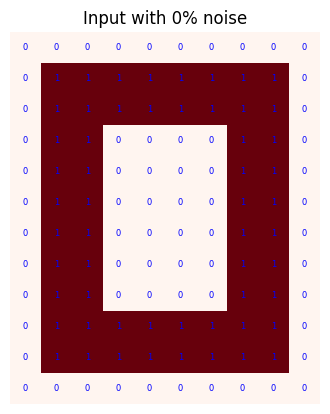

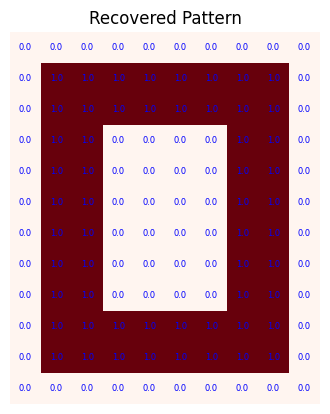

Pattern 0 with 10% noise:
Recovery accuracy: 100.00%
Energy: -72.92


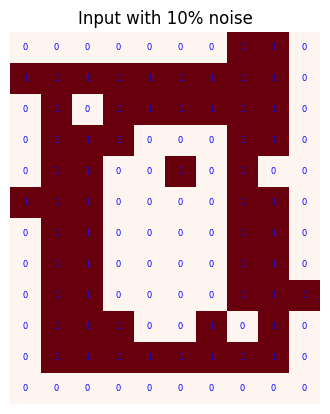

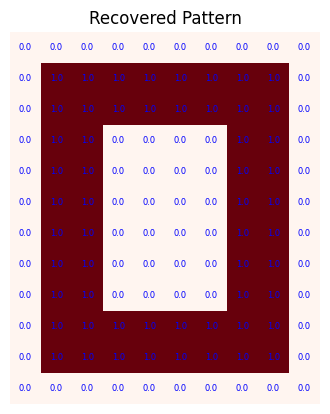

Pattern 0 with 30% noise:
Recovery accuracy: 100.00%
Energy: -72.92


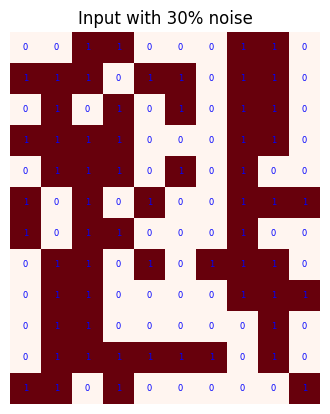

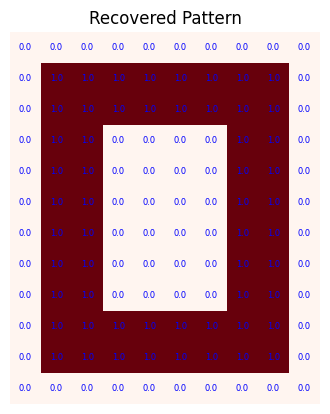

Pattern 0 with 50% noise:
Recovery accuracy: 20.00%
Energy: -83.32


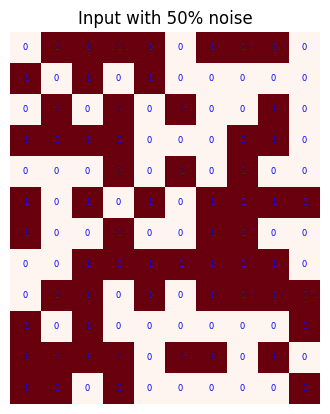

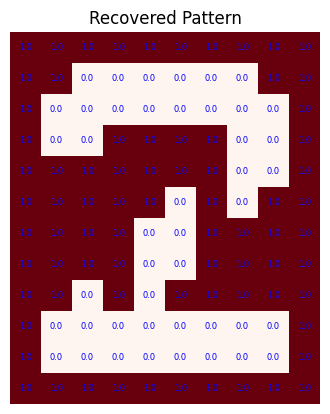


 === Testing Pattern 1 ===
Pattern 1 with 0% noise:
Recovery accuracy: 100.00%
Energy: -70.27


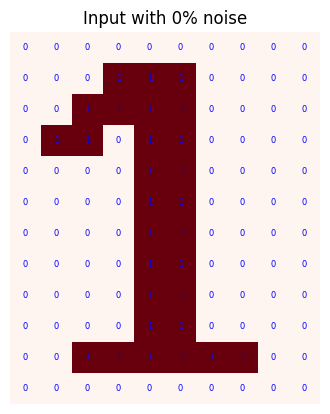

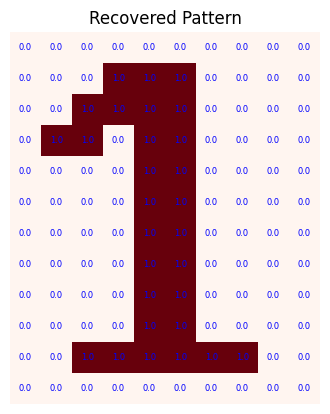

Pattern 1 with 10% noise:
Recovery accuracy: 100.00%
Energy: -70.27


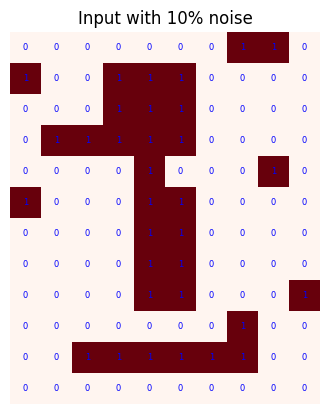

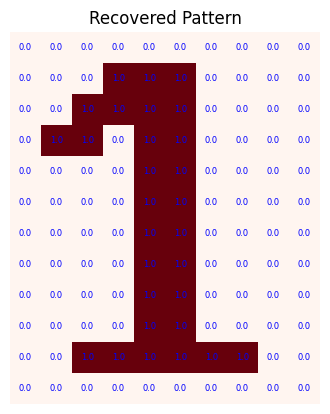

Pattern 1 with 30% noise:
Recovery accuracy: 100.00%
Energy: -70.27


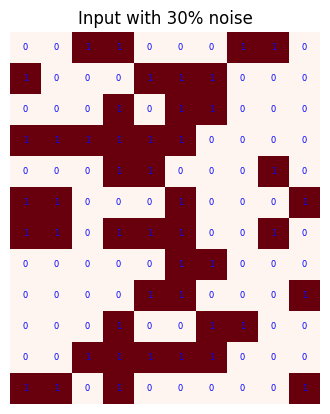

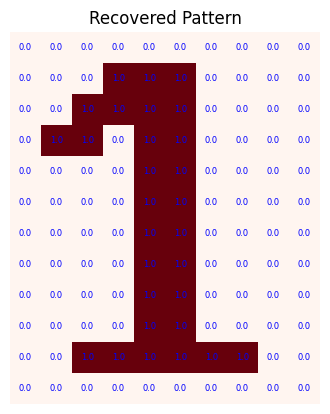

Pattern 1 with 50% noise:
Recovery accuracy: 29.17%
Energy: -81.98


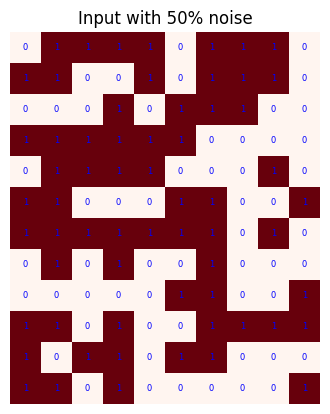

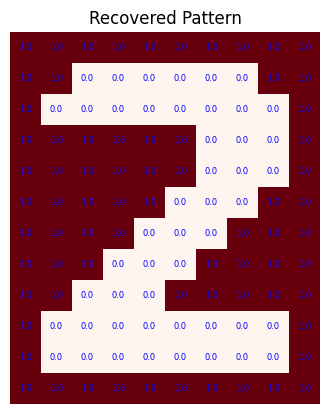


 === Testing Pattern 2 ===
Pattern 2 with 0% noise:
Recovery accuracy: 100.00%
Energy: -81.98


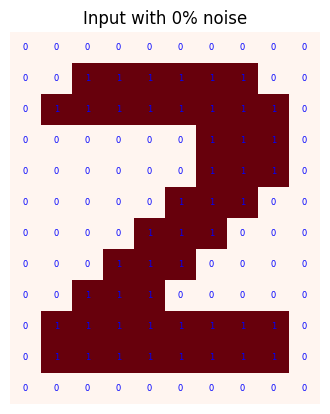

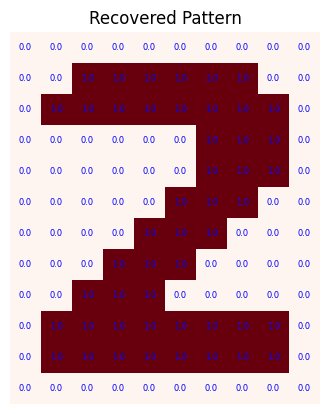

Pattern 2 with 10% noise:
Recovery accuracy: 100.00%
Energy: -81.98


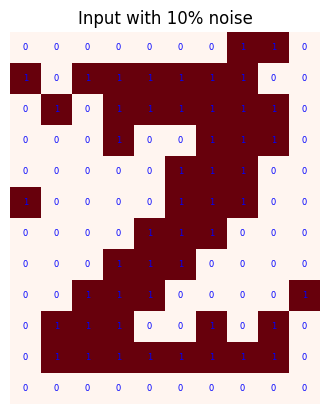

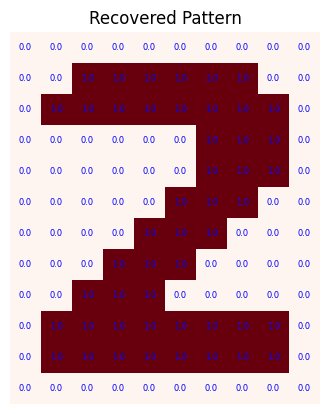

Pattern 2 with 30% noise:
Recovery accuracy: 100.00%
Energy: -81.98


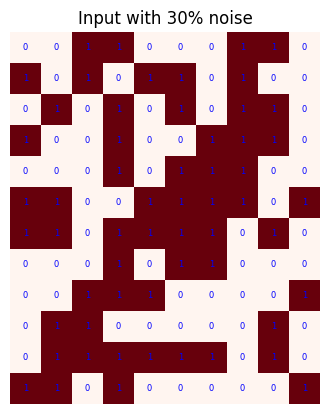

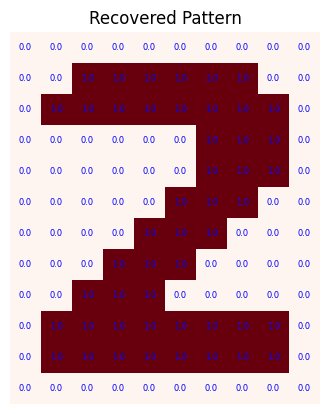

Pattern 2 with 50% noise:
Recovery accuracy: 29.17%
Energy: -70.27


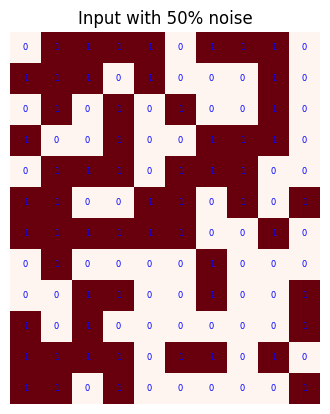

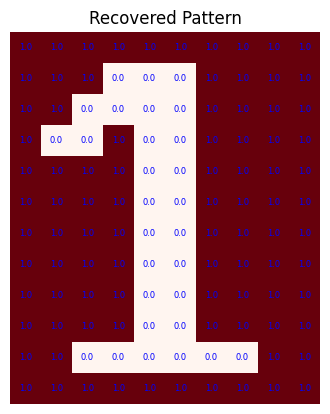


Generating visualizations...


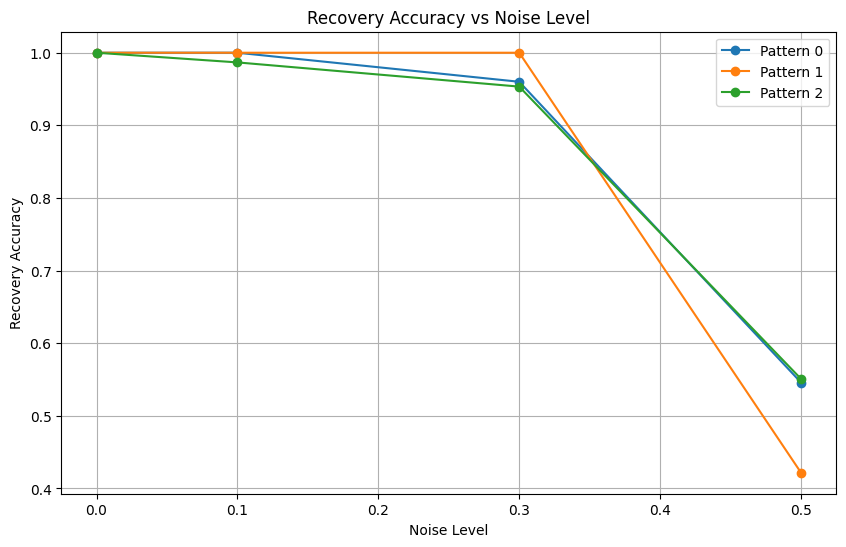

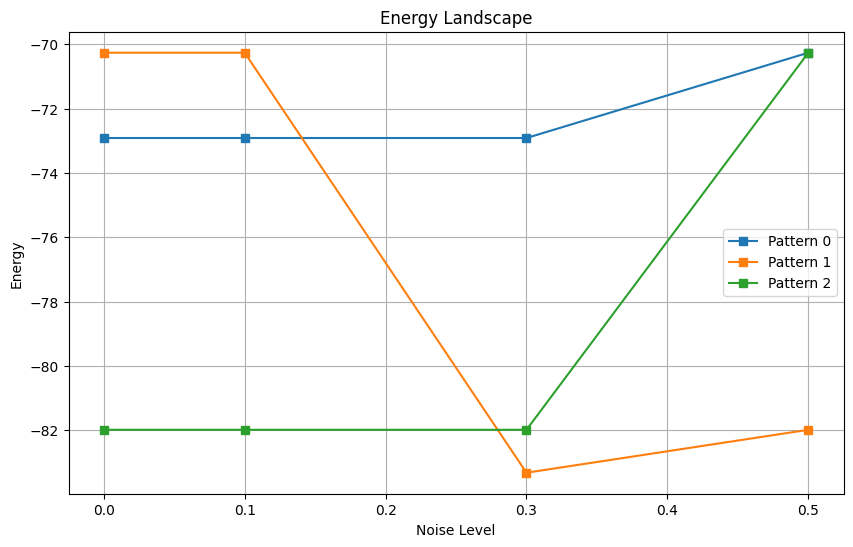

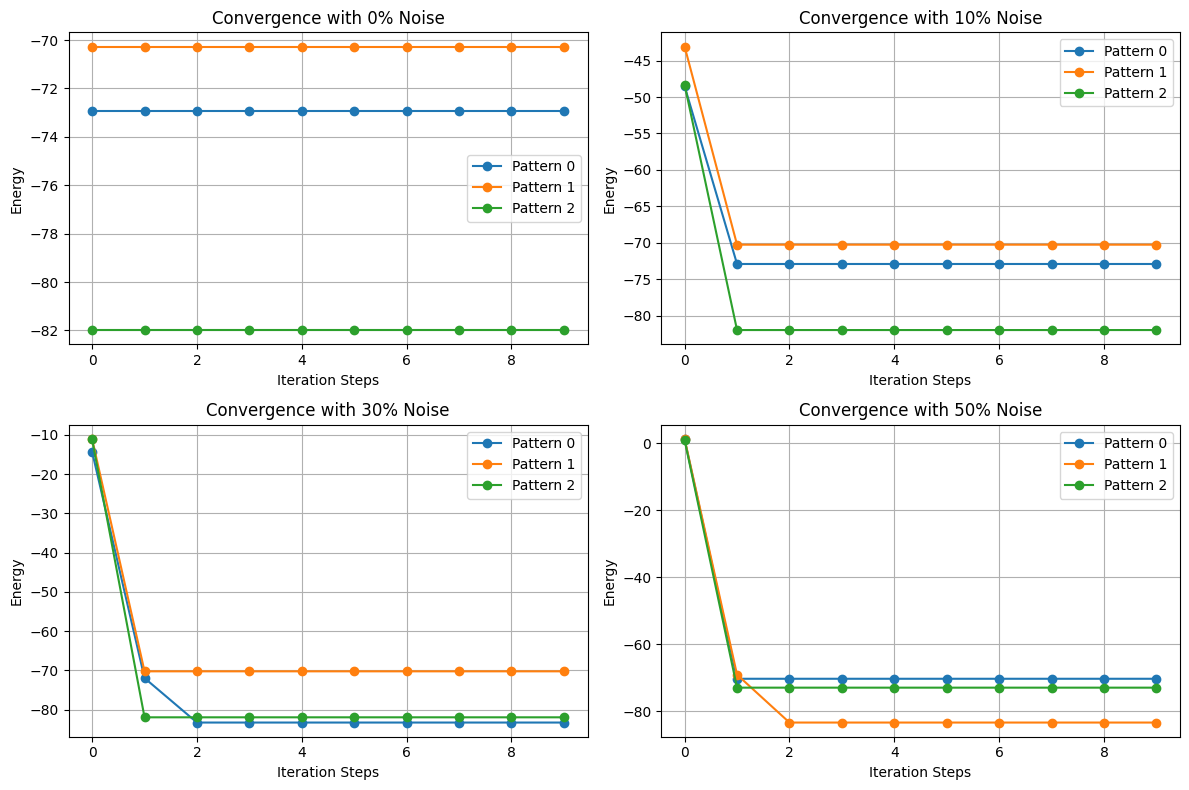

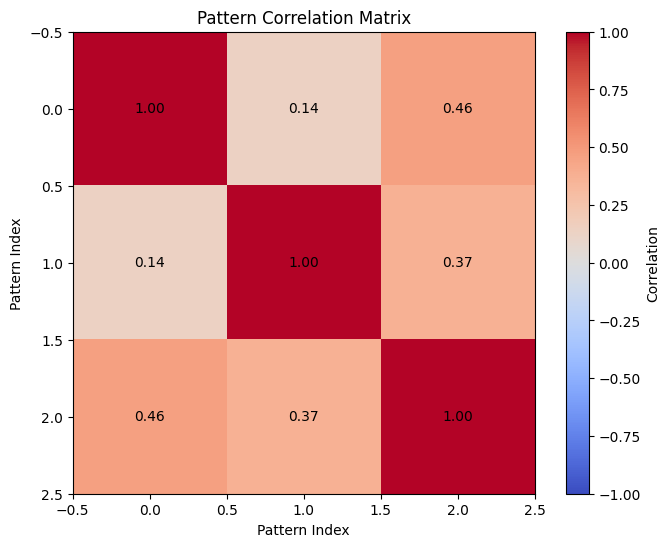

''

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Pattern Definitions (12 x 10) -----
# Define three digit patterns: "zero", "one", and "two" as 12x10 binary images (0 = background, 1 = foreground)
zero = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])

one = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,1,1,1,1,0,0,0,0],
    [0,1,1,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])

two = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,1,1,1,0],
    [0,0,0,0,0,0,1,1,1,0],
    [0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,1,1,1,0,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])

patterns = [zero, one, two]

# ----- Helper Functions -----
def binarize(p):
    # convert binary pattern (0 and 1) into bipolar (-1 and 1),
    # which is required for Hopfield network operations.
    return 2 * p.flatten() - 1  # Flatten 2D array and map 0->-1, 1->1

def add_noise(pattern, noise_level):
    # Add noise by flipping a percentage of bits in the pattern
    noises = pattern.copy()
    n_flips = int(len(noises) * noise_level)    # Number of bits to flip
    indices = np.random.choice(len(noises), n_flips, replace=False) # Random indices
    noises[indices] *= -1   # Flip bits (1 -> -1, -1 -> 1)
    return noises

def display_pattern(pattern, title=""):
    # Visualize the pattern as a 12x10 grid with color and numbers.
    binary = ((pattern + 1) // 2).reshape(12, 10)   # Convert back to 0/1 and reshape
    plt.figure(figsize=(4, 5))
    plt.imshow(binary, cmap='Reds', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    # Display individual digits
    for r in range(12):
        for c in range(10):
            plt.text(c, r, str(binary[r, c]), va='center', ha='center', fontsize=6, color='blue')
    plt.show()

def energy(pattern, weight):
    # Hopfield能量函数：E = -1/2 * x^T * W * x
    return -0.5 * pattern @ weight @ pattern

def recovery_accuracy(original, recover):
    # 恢复准确率：多少比例的像素恢复成功
    return np.mean(original == recover)

# ----- Hopfield Network Functions -----
def train_hopfield(pattern):
    # Train a Hopfield network using Hebbian learning.
    # Returns the weight matrix
    n = len(pattern[0]) # Total number of neurons (input size)
    weight = np.zeros((n, n))
    for p in pattern:
        weight += np.outer(p, p)    # Hebbian outer product for each pattern
    np.fill_diagonal(weight, 0) # No self-connections
    return weight / n

def recall(weight, pattern, steps=5):
    x = pattern.copy()
    for _ in range(steps):
        x = np.sign(weight @ x) # Matrix-vector multiplication followed by sign
    return x

# ----- Main Experiment -----

# Convert all 0/1 patterns to bipolar (-1, 1)
binarize_patterns = [binarize(p) for p in patterns]

# Train the network using the binarize patterns
w = train_hopfield(binarize_patterns)

# Define different levels of noise to test
noise_levels = [0.0, 0.1, 0.3, 0.5]

# Try recalling each pattern under different noise levels
for i, p in enumerate(binarize_patterns):
    print(f"\n === Testing Pattern {i} ===")
    for noise in noise_levels:
        np.random.seed(0)   # reproducible noise
        noisy = add_noise(p, noise)     # Add noise
        recovered = recall(w, noisy)    # Run recall process
        acc = recovery_accuracy(p, recovered)
        en = energy(recovered, w)

        print(f"Pattern {i} with {int(noise*100)}% noise:")
        print(f"Recovery accuracy: {acc*100:.2f}%")
        print(f"Energy: {en:.2f}")

        display_pattern(noisy, title=f"Input with {int(noise*100)}% noise")
        display_pattern(recovered, title="Recovered Pattern")

# Add after the main experiment loop

def plot_accuracy_vs_noise(num_trials=10):
    plt.figure(figsize=(10, 6))
    for i in range(len(patterns)):
        accuracies = []
        for noise in noise_levels:
            total_acc = 0
            for _ in range(num_trials):
                noisy = add_noise(binarize_patterns[i], noise)
                recovered = recall(w, noisy)
                acc = recovery_accuracy(binarize_patterns[i], recovered)
                total_acc += acc
            avg_acc = total_acc / num_trials
            accuracies.append(avg_acc)
        plt.plot(noise_levels, accuracies, 'o-', label=f'Pattern {i}')
    
    plt.xlabel('Noise Level')
    plt.ylabel('Recovery Accuracy')
    plt.title('Recovery Accuracy vs Noise Level')
    plt.legend()
    plt.grid(True)
    plt.savefig('accuracy_vs_noise.png')
    plt.show()



def plot_energy_landscape():
    plt.figure(figsize=(10, 6))
    for i in range(len(patterns)):
        energies = []
        for noise in noise_levels:
            noisy = add_noise(binarize_patterns[i], noise)
            recovered = recall(w, noisy)
            en = energy(recovered, w)
            energies.append(en)
        plt.plot(noise_levels, energies, 's-', label=f'Pattern {i}')
    
    plt.xlabel('Noise Level')
    plt.ylabel('Energy')
    plt.title('Energy Landscape')
    plt.legend()
    plt.grid(True)
    plt.savefig('energy_landscape.png')
    plt.show()

def plot_convergence():
    steps = 10
    plt.figure(figsize=(12, 8))
    
    # Create subplots for each noise level
    for idx, noise_level in enumerate(noise_levels):
        plt.subplot(2, 2, idx+1)
        
        for i, pattern in enumerate(binarize_patterns):
            noisy = add_noise(pattern, noise_level)
            x = noisy.copy()
            energies = []
            
            for _ in range(steps):
                en = energy(x, w)
                energies.append(en)
                x = np.sign(w @ x)
            
            plt.plot(range(steps), energies, 'o-', label=f'Pattern {i}')
        
        plt.xlabel('Iteration Steps')
        plt.ylabel('Energy')
        plt.title(f'Convergence with {int(noise_level*100)}% Noise')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.savefig('convergence.png')
    plt.show()

def plot_correlation_matrix():
    n_patterns = len(patterns)
    corr_matrix = np.zeros((n_patterns, n_patterns))
    
    for i in range(n_patterns):
        for j in range(n_patterns):
            corr_matrix[i,j] = np.corrcoef(binarize_patterns[i], binarize_patterns[j])[0,1]
    
    plt.figure(figsize=(8, 6))
    plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.title('Pattern Correlation Matrix')
    plt.xlabel('Pattern Index')
    plt.ylabel('Pattern Index')
    
    # Add correlation values as text
    for i in range(n_patterns):
        for j in range(n_patterns):
            plt.text(j, i, f'{corr_matrix[i,j]:.2f}', 
                    ha='center', va='center')
    
    plt.savefig('correlation_matrix.png')
    plt.show()


# Generate all plots
print("\nGenerating visualizations...")
plot_accuracy_vs_noise()
plot_energy_landscape()
plot_convergence()
plot_correlation_matrix()


input("Press ENTER to exit...")

Each plot provides different insights:

Accuracy vs Noise: Shows how well patterns are recovered at different noise levels
Energy Landscape: Visualizes the stability of recovered patterns

Convergence Plot: Shows how quickly patterns converge to stable states

Correlation Matrix: Shows relationships between stored patterns

1. Accuracy vs Noise Plot
        Shows recovery performance as noise increases (0% to 50%)

        X-axis: Noise level (0.0 to 0.5)

        Y-axis: Recovery accuracy (0% to 100%)

        Each line represents a different pattern

        Higher accuracy means better pattern recovery

        Typically shows degrading performance with increasing noise

2. Energy Landscape Plot

        Displays network stability at different noise levels

        X-axis: Noise level

        Y-axis: Energy value

        Lower energy indicates more stable state

        Local minima represent stored patterns

        Helps visualize network's attractor states

3. Convergence Plot

        Shows how quickly patterns stabilize during recall

        Four subplots for different noise levels (0%, 10%, 30%, 50%)

        X-axis: Iteration steps

        Y-axis: Energy value

        Descending curves indicate convergence

        Flatter lines mean more stable patterns

4. Correlation Matrix

        Visualizes similarity between stored patterns

        Size: N×N (N = number of patterns)

        Values range from -1 (inverse correlation) to 1 (perfect correlation)

        Diagonal always shows 1.0 (self-correlation)

        Helps identify potential pattern interference

        Uses color coding:
                Red: Positive correlation

                Blue: Negative correlation

                White: No correlation

These plots together provide a comprehensive view of the network's:

        Pattern recovery capability
        Stability characteristics
        Convergence behavior
        Pattern relationships

1. Accuracy vs Noise Plot (plot_accuracy_vs_noise())

        Purpose: Measures pattern recovery performance with increasing noise
        Interpretation:

        X-axis: Noise levels (0.0 to 0.5)

        Y-axis: Recovery accuracy (0% to 100%)

        Each line represents one pattern (0, 1, or 2)

2. Energy Landscape Plot (plot_energy_landscape())

        Purpose: Shows system stability and attractor states
        Interpretation:

        X-axis: Noise levels

        Y-axis: Energy values (lower = more stable)

        Each curve represents a pattern's energy state

        Local minima indicate stable stored patterns

        Energy calculated as: E = -1/2 * x^T * W * x

3. Convergence Plot (plot_convergence())

        Purpose: Visualizes network dynamics during pattern recall
        Features:

        4 subplots (one for each noise level)

        Shows energy evolution over iteration steps
        Interpretation:

        Downward slope = converging to stable state

        Flat line = reached stable state

        Different starting points = different initial noise levels

4. Correlation Matrix Plot (plot_correlation_matrix())

        Purpose: Shows pattern similarities and potential interference
        Features:

        Size: 3x3 matrix (for 3 patterns)

        Values range: [-1, 1]

        Color coding:
            Red = positive correlation
            Blue = negative correlation
            White = no correlation
            Diagonal always = 1.0 (self-correlation)

Key Insights from Combined Plots:

Pattern Stability: Higher noise levels → Lower accuracy

Convergence Speed: More noise → Slower convergence

Pattern Interference: Higher correlation → More interference

System Robustness: Energy landscape shows stability regions       